In [10]:
import pandas as pd
import xml.etree.cElementTree as et
import matplotlib.pyplot as plt

# parse bcn file (just xml)
matches_file = "Summer PR Draft 1.bcn"
parsedXML = et.parse(matches_file)

In [11]:
# settings
multipler = parsedXML.getroot().find("Settings").get('Multiplier')
minmatches = parsedXML.getroot().find("Settings").get('MinMatches')
decay = parsedXML.getroot().find("Settings").get('Decay')
decayValue = parsedXML.getroot().find("Settings").get('DecayValue')
print("Settings: \n Multiplier: {} \n Min Matches: {} \n Decay: {} \n Decay Value: {} \n". format(multipler, minmatches, decay, decayValue))

Settings: 
 Multiplier: 200 
 Min Matches: 4 
 Decay: 3 
 Decay Value: 2 



In [12]:
# parse matches into list of dicts
matches = []
for match in parsedXML.getroot().find("Matches").getchildren():
    matches.append({
        "id": match.get("ID"),
        "timestamp": match.get("Timestamp"),
        "order": match.get("order"),
        "tournament": match.get("Tournament"),
        "description": match.get("Description"),
        "player1": match.get("Player1"),
        "player2": match.get("Player2"),
        "winner": match.get("Winner")
    })
    
# pass list of dicts to pandas
matches_df = pd.DataFrame(matches)
matches_df.head()

,description,id,order,player1,player2,timestamp,tournament,winner
0,sanantoniomelee - Muramasa Monday Redemption 66,ab707ee35e224f5187754a431cf9a565,None,Mighty,Riff,6/4/2018 9:46:48 PM,Muramasa Monday Redemption 66,1
1,sanantoniomelee - Muramasa Monday Redemption 66,77f18550f24a46f6ae68a3cf95789760,None,Blitz,PopStar,6/4/2018 9:46:48 PM,Muramasa Monday Redemption 66,2
2,sanantoniomelee - Muramasa Monday Redemption 66,79c81769f81f4c4ea9c6c792790242f6,None,Clipman,Velocity,6/4/2018 9:46:48 PM,Muramasa Monday Redemption 66,1
3,sanantoniomelee - Muramasa Monday Redemption 66,fa024be387254276aacb5201a1f9b179,None,HS,Deca,6/4/2018 9:46:48 PM,Muramasa Monday Redemption 66,1
4,sanantoniomelee - Muramasa Monday Redemption 66,9c58853a1af647c6b18791bb81fba8e7,None,Bean,Your Dad's Yoshi,6/4/2018 9:46:48 PM,Muramasa Monday Redemption 66,1


In [13]:
# parse players into a list of dicts
players = []
for player in parsedXML.getroot().find("Players").getchildren():
    players.append({
        "name": player.get("Name"),
        "team": player.get("Team"),
        "invisible": player.get("Invisible"),
        "characters": player.get("Characters"),
        "alts": player.get("Alts")
    })
# pass list of dicts into pandas
players_df = pd.DataFrame(players)
players_df.head()
players_df = players_df.set_index("name")
# turn alts in matches_df into primary name

player1_wins = matches_df.loc[matches_df['winner'] == "1"]
player2_wins = matches_df.loc[matches_df['winner'] == "2"]

players_df = pd.concat((players_df, player1_wins['player1'].value_counts().rename("p1wins")), axis=1)
players_df = pd.concat((players_df, player1_wins['player2'].value_counts().rename("p1losses")), axis=1)
players_df = pd.concat((players_df, player2_wins['player2'].value_counts().rename("p2wins")), axis=1)
players_df = pd.concat((players_df, player2_wins['player1'].value_counts().rename("p2losses")), axis=1)

# count matches
player2_counts = matches_df['player2'].value_counts()
player1_counts = matches_df['player1'].value_counts()

players_df = players_df.join(player1_counts)
players_df = players_df.join(player2_counts)

players_df = players_df.fillna(0)


players_df['total_wins'] = players_df['p1wins'] + players_df['p2wins']
players_df['total_losses'] = players_df['p1losses'] + players_df['p2losses']
players_df['total_matches'] = players_df['player1'] + players_df['player2']
players_df['win_ratio'] = players_df['total_wins'] / players_df['total_losses']
players_df = players_df.reset_index()
players_df

/Users/f00/anaconda/envs/machine_learning_cookbook/lib/python3.6/site-packages/ipykernel/__main__.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/f00/anaconda/envs/machine_learning_cookbook/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/f00/anaconda/envs/machine_learning_cookbook/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, 

,index,alts,characters,invisible,team,p1wins,p1losses,p2wins,p2losses,player1,player2,total_wins,total_losses,total_matches,win_ratio
0,4SK,,,false,,6.0,7.0,6.0,1.0,7.0,13,12.0,8.0,20.0,1.500000
1,5ive,5,,false,,12.0,6.0,4.0,0.0,12.0,10,16.0,6.0,22.0,2.666667
2,Abby,,,false,,2.0,6.0,4.0,2.0,4.0,10,6.0,8.0,14.0,0.750000
3,Africa,,,false,,0.0,4.0,0.0,0.0,0.0,4,0.0,4.0,4.0,0.000000
4,Afukasi,,,false,,0.0,2.0,0.0,0.0,0.0,2,0.0,2.0,2.0,0.000000
5,Antlion,,,false,,24.0,20.0,8.0,12.0,36.0,28,32.0,32.0,64.0,1.000000
6,Aquaman,,,false,,3.0,2.0,2.0,2.0,5.0,4,5.0,4.0,9.0,1.250000
7,Arc,FX | Arc,,false,,46.0,0.0,2.0,3.0,49.0,2,48.0,3.0,51.0,16.000000
8,BOP,Bop,,false,,1.0,5.0,0.0,1.0,2.0,5,1.0,6.0,7.0,0.166667
9,Bamda,,,false,,0.0,2.0,0.0,0.0,0.0,2,0.0,2.0,2.0,0.000000


In [14]:
# number of players, number of matches, number of tournaments
num_players = len(players_df)
num_matches = len(matches_df)
num_tournaments = len(matches_df['tournament'].unique())
print("Number of Players: {}".format(num_players))
print("Number of Matches: {}".format(num_matches))
print("Number of Tournaments: {}".format(num_tournaments))

Number of Players: 134
Number of Matches: 1818
Number of Tournaments: 52


In [15]:
# number of unique player1 player 2 matches
len(matches_df[['player1', 'player2']].drop_duplicates())

1221

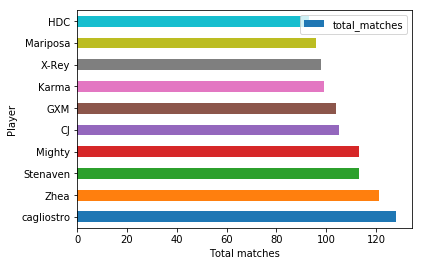

In [16]:
players_df = players_df.sort_values('total_matches', ascending=False)
total_matches_by_player_plot = players_df[:10].reset_index().plot(x='index', y='total_matches', kind="barh")
total_matches_by_player_plot.set_xlabel('Total matches')
total_matches_by_player_plot.set_ylabel('Player')
# todo add match numbers on bars
plt.show()

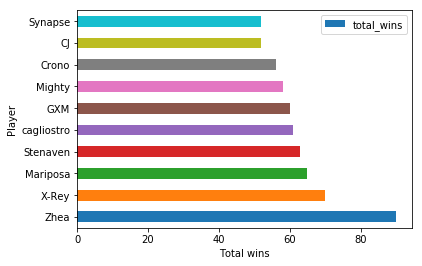

In [17]:
players_df = players_df.sort_values('total_wins', ascending=False)
total_wins_by_player_plot = players_df[:10].plot(x='index', y='total_wins', kind="barh")
total_wins_by_player_plot.set_xlabel('Total wins')
total_wins_by_player_plot.set_ylabel('Player')
# todo add match numbers on bars
plt.show()

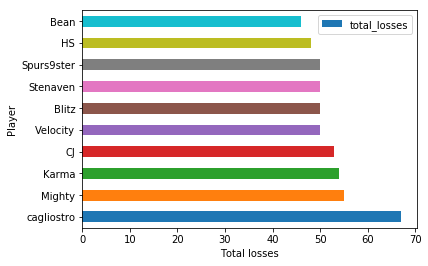

In [18]:
players_df = players_df.sort_values('total_losses', ascending=False)
total_losses_by_player_plot = players_df[:10].plot(x='index', y='total_losses', kind="barh")
total_losses_by_player_plot.set_xlabel('Total losses')
total_losses_by_player_plot.set_ylabel('Player')
# todo add match numbers on bars
plt.show()

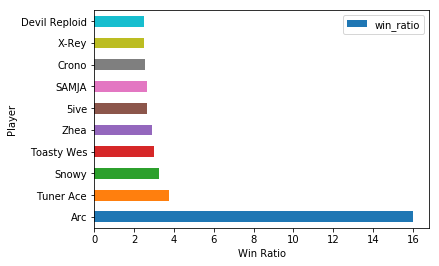

In [19]:
players_df = players_df.sort_values('win_ratio', ascending=False)
win_ratio_by_player_plot = players_df[:10].plot(x='index', y='win_ratio', kind="barh")
win_ratio_by_player_plot.set_xlabel('Win Ratio')
win_ratio_by_player_plot.set_ylabel('Player')
# todo add match numbers on bars
plt.show()

In [20]:
# for each player
# total games
# total wins
# total losses
# total draws

# score (SkillKeeper uses this: https://github.com/moserware/Skills)
# python ports/implementations
# https://github.com/McLeopold/PythonSkills/
# https://github.com/dougz/trueskill
# https://github.com/sublee/trueskill

# score = mu - (k*sigma)
# what is k

# decay? - the way this is implemented seems retarded
# multiplier?

# sort matches by date
# for match in matches
#   pass winner to trueskill
#   update mu and sigma for each player
#   update last match date for each player
#   update wins, losses, draws, total games for each player
# calculate elo using skills: https://github.com/McLeopold/PythonSkills/blob/master/skills/__init__.py